In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds

In [13]:
plt.rc('font', size=12)

In [18]:
# No REx - LR 0.001 - Divide Core
MP165 = get_results("MP165")
MP166 = get_results("MP166")
MP167 = get_results("MP167")

# No REx - LR 0.1 - Divide Total
MP232 = get_results("MP232")
MP233 = get_results("MP233")
MP234 = get_results("MP234")

# REx - 0.1 - LR 0.1 - Divide Total
MP235 = get_results("MP235")
MP236 = get_results("MP236")
MP237 = get_results("MP237")

# REx - 1.0 - LR 0.1 - Divide Total
MP238 = get_results("MP238")
MP239 = get_results("MP239")
MP240 = get_results("MP240")

# REx - 10.0 - LR 0.1 - Divide Total
MP241 = get_results("MP241")
MP242 = get_results("MP242")
MP243 = get_results("MP243")

# No REx - LR 0.001 - Divide Total
MP199 = get_results("MP199")
MP200 = get_results("MP200")
MP201 = get_results("MP201")

# REx - 1.0 - LR 0.001 - Divide Total
MP186 = get_results("MP186")
MP187 = get_results("MP187")
MP188 = get_results("MP188")

# REx - 10.0 - LR 0.001 - Divide Total
MP183 = get_results("MP183")
MP184 = get_results("MP184")
MP185 = get_results("MP185")

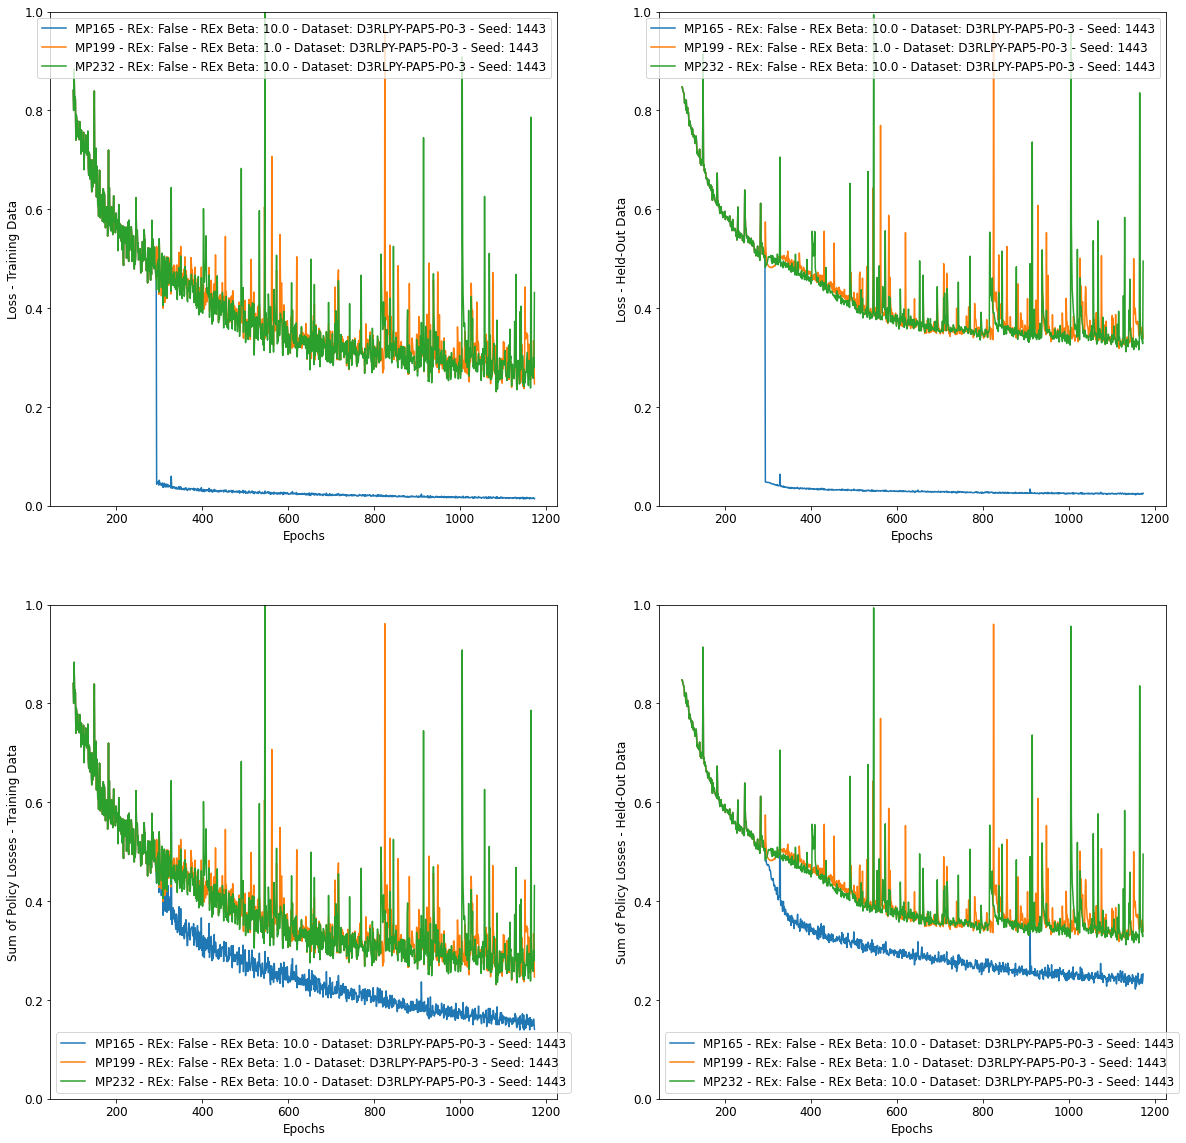

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP165,
    MP199,
    MP232
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,1.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,1.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,1.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,1.)
    ax[1,1].legend()
pass

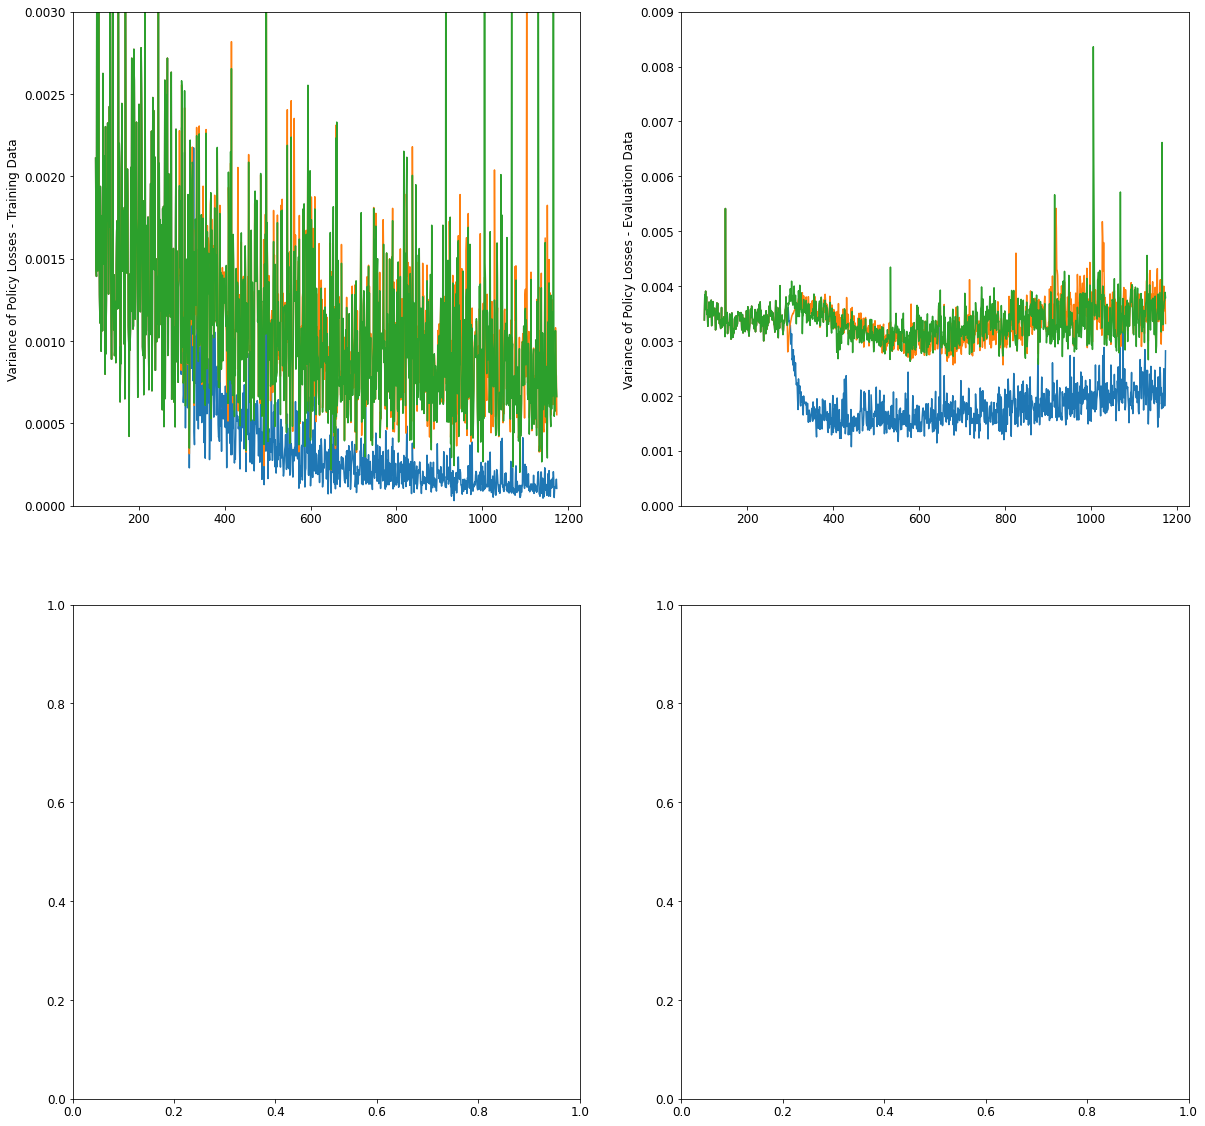

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP165, None), # MP165_details),
    (MP199, None), # MP199_details),
    (MP232, None), # MP232_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.003)

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.009)

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

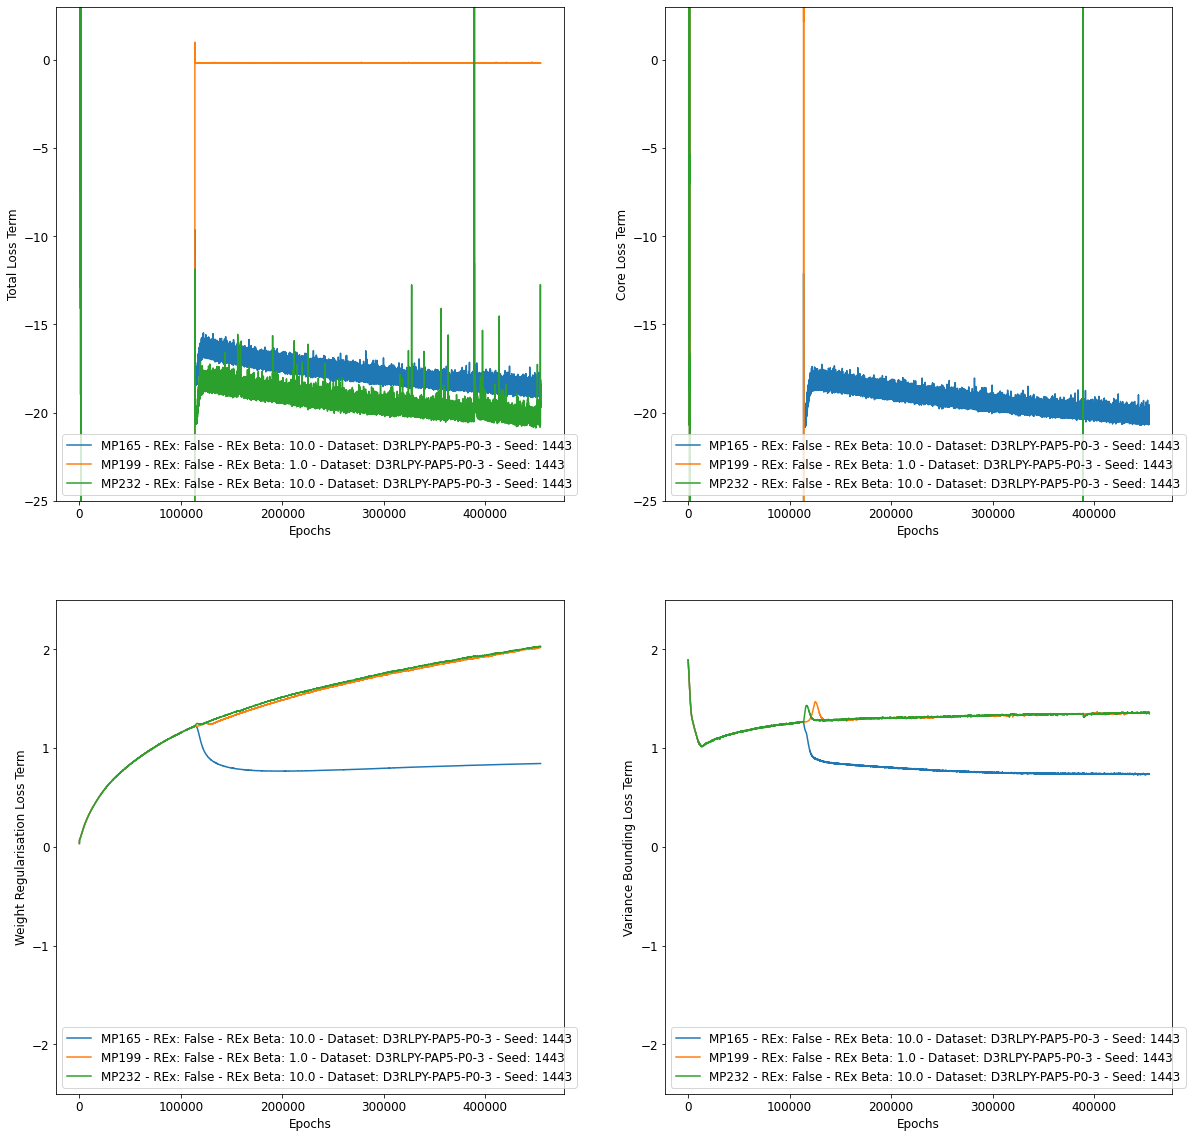

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP165,
    MP199,
    MP232
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass